# Long Short Term Memory

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Cleaned_Dataset.csv.zip',low_memory=False, compression= 'gzip')
df

,Date,Month,Pickup_Time,lpep_pickup_datetime,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,Pickup_Latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration
0,2021-01-01 00:00:00,January,19:39:11,2021-01-01 19:39:11,2021-01-01 19:45:01,19:45:01,95,Forest Hills,Queens,40.719594,...,6.50,1.0,0.5,2.08,0.0,0.3,10.38,0.0,1.915115,5.833333
1,2021-01-01 00:00:00,January,01:25:00,2021-01-01 01:25:00,2021-01-01 01:35:00,01:35:00,181,Park Slope,Brooklyn,40.670103,...,12.89,0.0,0.0,2.75,0.0,0.3,15.94,0.0,2.414010,10.000000
2,2021-01-01 00:00:00,January,01:04:00,2021-01-01 01:04:00,2021-01-01 01:12:00,01:12:00,159,Melrose South,Bronx,42.841617,...,20.53,0.0,0.0,2.75,0.0,0.3,23.58,0.0,2.864625,8.000000
3,2021-01-01 00:00:00,January,01:34:00,2021-01-01 01:34:00,2021-01-01 01:59:00,01:59:00,155,Marine Park/Mill Basin,Brooklyn,40.609833,...,23.84,0.0,0.0,2.75,0.0,0.3,26.89,0.0,8.175447,25.000000
4,2021-01-01 00:00:00,January,01:38:00,2021-01-01 01:38:00,2021-01-01 01:47:00,01:47:00,55,Coney Island,Brooklyn,40.575807,...,13.34,0.0,0.0,2.75,0.0,0.3,16.39,0.0,2.076049,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014715,2021-12-31 00:00:00,December,13:42:19,2021-12-31 13:42:19,2021-12-31 13:51:52,13:51:52,49,Clinton Hill,Brooklyn,40.689722,...,8.00,0.0,0.5,1.76,0.0,0.3,10.56,0.0,2.301356,9.550000
1014716,2021-12-31 00:00:00,December,14:01:55,2021-12-31 14:01:55,2021-12-31 14:18:36,14:18:36,97,Fort Greene,Brooklyn,40.690771,...,12.50,0.0,0.5,2.66,0.0,0.3,15.96,0.0,4.554432,16.683333
1014717,2021-12-31 00:00:00,December,13:21:58,2021-12-31 13:21:58,2021-12-31 13:33:27,13:33:27,97,Fort Greene,Brooklyn,40.690771,...,9.00,0.0,0.5,0.00,0.0,0.3,9.80,0.0,2.365730,11.483333
1014718,2021-12-31 00:00:00,December,13:36:59,2021-12-31 13:36:59,2021-12-31 13:54:41,13:54:41,74,East Harlem North,Manhattan,42.057937,...,13.00,0.0,0.5,2.76,0.0,0.3,16.56,0.0,4.119910,17.700000


In [6]:
df['lpep_pickup_datetime'] = pd.to_datetime(df.lpep_pickup_datetime)
df['lpep_dropoff_datetime'] = pd.to_datetime(df.lpep_dropoff_datetime)
df['Date'] = pd.to_datetime(df.Date)

In [7]:
df['trips'] = df.reset_index().index
df

,Date,Month,Pickup_Time,lpep_pickup_datetime,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,Pickup_Latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration,trips
0,2021-01-01,January,19:39:11,2021-01-01 19:39:11,2021-01-01 19:45:01,19:45:01,95,Forest Hills,Queens,40.719594,...,1.0,0.5,2.08,0.0,0.3,10.38,0.0,1.915115,5.833333,0
1,2021-01-01,January,01:25:00,2021-01-01 01:25:00,2021-01-01 01:35:00,01:35:00,181,Park Slope,Brooklyn,40.670103,...,0.0,0.0,2.75,0.0,0.3,15.94,0.0,2.414010,10.000000,1
2,2021-01-01,January,01:04:00,2021-01-01 01:04:00,2021-01-01 01:12:00,01:12:00,159,Melrose South,Bronx,42.841617,...,0.0,0.0,2.75,0.0,0.3,23.58,0.0,2.864625,8.000000,2
3,2021-01-01,January,01:34:00,2021-01-01 01:34:00,2021-01-01 01:59:00,01:59:00,155,Marine Park/Mill Basin,Brooklyn,40.609833,...,0.0,0.0,2.75,0.0,0.3,26.89,0.0,8.175447,25.000000,3
4,2021-01-01,January,01:38:00,2021-01-01 01:38:00,2021-01-01 01:47:00,01:47:00,55,Coney Island,Brooklyn,40.575807,...,0.0,0.0,2.75,0.0,0.3,16.39,0.0,2.076049,9.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014715,2021-12-31,December,13:42:19,2021-12-31 13:42:19,2021-12-31 13:51:52,13:51:52,49,Clinton Hill,Brooklyn,40.689722,...,0.0,0.5,1.76,0.0,0.3,10.56,0.0,2.301356,9.550000,1014715
1014716,2021-12-31,December,14:01:55,2021-12-31 14:01:55,2021-12-31 14:18:36,14:18:36,97,Fort Greene,Brooklyn,40.690771,...,0.0,0.5,2.66,0.0,0.3,15.96,0.0,4.554432,16.683333,1014716
1014717,2021-12-31,December,13:21:58,2021-12-31 13:21:58,2021-12-31 13:33:27,13:33:27,97,Fort Greene,Brooklyn,40.690771,...,0.0,0.5,0.00,0.0,0.3,9.80,0.0,2.365730,11.483333,1014717
1014718,2021-12-31,December,13:36:59,2021-12-31 13:36:59,2021-12-31 13:54:41,13:54:41,74,East Harlem North,Manhattan,42.057937,...,0.0,0.5,2.76,0.0,0.3,16.56,0.0,4.119910,17.700000,1014718


In [8]:
Df = df.groupby(pd.Grouper(key='lpep_pickup_datetime', axis=0, freq='H')).count()
Df

,Date,Month,Pickup_Time,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,Pickup_Latitude,Pickup_Longitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration,trips
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
2021-01-01 01:00:00,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
2021-01-01 02:00:00,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2021-01-01 03:00:00,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
2021-01-01 04:00:00,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
2021-12-31 20:00:00,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
2021-12-31 21:00:00,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95


In [9]:
Df.reset_index(inplace=True, level=['lpep_pickup_datetime'])
Df

,lpep_pickup_datetime,Date,Month,Pickup_Time,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,Pickup_Latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration,trips
0,2021-01-01 00:00:00,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
1,2021-01-01 01:00:00,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
2,2021-01-01 02:00:00,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
3,2021-01-01 03:00:00,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
4,2021-01-01 04:00:00,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
8756,2021-12-31 20:00:00,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
8757,2021-12-31 21:00:00,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
8758,2021-12-31 22:00:00,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84


In [10]:
DF=Df[['lpep_pickup_datetime','trips']]
DF

,lpep_pickup_datetime,trips
0,2021-01-01 00:00:00,52
1,2021-01-01 01:00:00,46
2,2021-01-01 02:00:00,22
3,2021-01-01 03:00:00,21
4,2021-01-01 04:00:00,11
...,...,...
8755,2021-12-31 19:00:00,124
8756,2021-12-31 20:00:00,131
8757,2021-12-31 21:00:00,95
8758,2021-12-31 22:00:00,84


In [257]:
Train=DF.loc[(DF['lpep_pickup_datetime'] > '2021-12-08 23:00:00') & (DF['lpep_pickup_datetime']<'2021-12-16 00:00:00')]
Train

,lpep_pickup_datetime,trips
8208,2021-12-09 00:00:00,43
8209,2021-12-09 01:00:00,23
8210,2021-12-09 02:00:00,16
8211,2021-12-09 03:00:00,9
8212,2021-12-09 04:00:00,16
...,...,...
8371,2021-12-15 19:00:00,187
8372,2021-12-15 20:00:00,148
8373,2021-12-15 21:00:00,112
8374,2021-12-15 22:00:00,89


In [258]:
Train.set_index(keys='lpep_pickup_datetime',inplace = True)
Train

,trips
lpep_pickup_datetime,
2021-12-09 00:00:00,43
2021-12-09 01:00:00,23
2021-12-09 02:00:00,16
2021-12-09 03:00:00,9
2021-12-09 04:00:00,16
...,...
2021-12-15 19:00:00,187
2021-12-15 20:00:00,148
2021-12-15 21:00:00,112


In [259]:
Test =DF.loc[(DF['lpep_pickup_datetime'] > '2021-12-15 23:00:00') & (DF['lpep_pickup_datetime'] < '2021-12-17 00:00:00')]
Test

,lpep_pickup_datetime,trips
8376,2021-12-16 00:00:00,39
8377,2021-12-16 01:00:00,32
8378,2021-12-16 02:00:00,21
8379,2021-12-16 03:00:00,25
8380,2021-12-16 04:00:00,21
8381,2021-12-16 05:00:00,33
8382,2021-12-16 06:00:00,99
8383,2021-12-16 07:00:00,177
8384,2021-12-16 08:00:00,223
8385,2021-12-16 09:00:00,215


In [260]:
Test.set_index(keys='lpep_pickup_datetime',inplace = True)
Test

,trips
lpep_pickup_datetime,
2021-12-16 00:00:00,39
2021-12-16 01:00:00,32
2021-12-16 02:00:00,21
2021-12-16 03:00:00,25
2021-12-16 04:00:00,21
2021-12-16 05:00:00,33
2021-12-16 06:00:00,99
2021-12-16 07:00:00,177
2021-12-16 08:00:00,223


In [261]:
Train.shape

(168, 1)

In [262]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [263]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [264]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(Train)
test = scaler.fit_transform(Test)

In [265]:
train_size = len(train)
test_size = len(test) 
train, test = train[0:train_size,:], test[0:test_size,:]

In [266]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [267]:
trainX.shape

(156, 12)

In [268]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import maxnorm
from keras.optimizers import adam_v2

In [341]:
%%time
# create and fit the LSTM network
def create_model(learn_rate=0.0001,units=10,):
    model = Sequential()
    model.add(LSTM(units,input_dim=1))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
    model.summary()
    return model

Wall time: 0 ns


In [342]:
# create model
model = KerasRegressor(build_fn=create_model, verbose=0)

C:\Users\MSI95C\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [343]:
# define the grid search parameters
batch_size = [16,64,128,256,512]
epochs = [50, 100]
dimension=[24,50,100,168]
param_grid = dict(batch_size=batch_size, epochs=epochs,units=dimension)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = 1, cv=5)
# Applying grid search
grid_result = grid.fit(trainX, trainY)

Model: "sequential_233"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_233 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_233 (Dropout)       (None, 24)                0         
                                                                 
 dense_233 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_234"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_234 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_234 (Dropout)    

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_243 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_243 (Dropout)       (None, 100)               0         
                                                                 
 dense_243 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_244"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_244 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_244 (Dropout)       (None, 100)        

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_253 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_253 (Dropout)       (None, 24)                0         
                                                                 
 dense_253 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_254"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_254 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_254 (Dropout)       (None, 24)           

 Layer (type)                Output Shape              Param #   
 lstm_263 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_263 (Dropout)       (None, 100)               0         
                                                                 
 dense_263 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_264"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_264 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_264 (Dropout)       (None, 100)               0         
                                                

 Layer (type)                Output Shape              Param #   
 lstm_273 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_273 (Dropout)       (None, 24)                0         
                                                                 
 dense_273 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_274"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_274 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_274 (Dropout)       (None, 24)                0         
                                                  

 lstm_283 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_283 (Dropout)       (None, 100)               0         
                                                                 
 dense_283 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_284"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_284 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_284 (Dropout)       (None, 100)               0         
                                                                 
 dense_284 (Dense)           (None, 1)          

 lstm_293 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_293 (Dropout)       (None, 24)                0         
                                                                 
 dense_293 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_294"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_294 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_294 (Dropout)       (None, 24)                0         
                                                                 
 dense_294 (Dense)           (None, 1)            

 lstm_303 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_303 (Dropout)       (None, 100)               0         
                                                                 
 dense_303 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_304"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_304 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_304 (Dropout)       (None, 100)               0         
                                                                 
 dense_304 (Dense)           (None, 1)          

 lstm_313 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_313 (Dropout)       (None, 24)                0         
                                                                 
 dense_313 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_314"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_314 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_314 (Dropout)       (None, 24)                0         
                                                                 
 dense_314 (Dense)           (None, 1)            

                                                                 
 dropout_323 (Dropout)       (None, 100)               0         
                                                                 
 dense_323 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_324"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_324 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_324 (Dropout)       (None, 100)               0         
                                                                 
 dense_324 (Dense)           (None, 1)                 101       
                                                

                                                                 
 dropout_333 (Dropout)       (None, 24)                0         
                                                                 
 dense_333 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_334"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_334 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_334 (Dropout)       (None, 24)                0         
                                                                 
 dense_334 (Dense)           (None, 1)                 25        
                                                  

 dropout_343 (Dropout)       (None, 100)               0         
                                                                 
 dense_343 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_344"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_344 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_344 (Dropout)       (None, 100)               0         
                                                                 
 dense_344 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
No

 dropout_353 (Dropout)       (None, 24)                0         
                                                                 
 dense_353 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_354"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_354 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_354 (Dropout)       (None, 24)                0         
                                                                 
 dense_354 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-tr

                                                                 
 dense_363 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_364"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_364 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_364 (Dropout)       (None, 100)               0         
                                                                 
 dense_364 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
____________________________________________

                                                                 
 dense_373 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_374"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_374 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_374 (Dropout)       (None, 24)                0         
                                                                 
 dense_374 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
________________________________________________

 dense_383 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_384"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_384 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_384 (Dropout)       (None, 100)               0         
                                                                 
 dense_384 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_385"
____________________

 dense_393 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_394"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_394 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_394 (Dropout)       (None, 24)                0         
                                                                 
 dense_394 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_395"
________________________

                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_404"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_404 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_404 (Dropout)       (None, 100)               0         
                                                                 
 dense_404 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_405"
_________________________________________________________________
 Layer (type)       

                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_414"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_414 (LSTM)             (None, 24)                2496      
                                                                 
 dropout_414 (Dropout)       (None, 24)                0         
                                                                 
 dense_414 (Dense)           (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_415"
_________________________________________________________________
 Layer (type)           

Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_424"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_424 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_424 (Dropout)       (None, 100)               0         
                                                                 
 dense_424 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_425"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_425 (LSTM)    

Total params: 114,409
Trainable params: 114,409
Non-trainable params: 0
_________________________________________________________________


In [344]:
# summarize results:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.018409 using {'batch_size': 16, 'epochs': 100, 'units': 168}
-0.092197 (0.036869) with: {'batch_size': 16, 'epochs': 50, 'units': 24}
-0.080231 (0.027458) with: {'batch_size': 16, 'epochs': 50, 'units': 50}
-0.027951 (0.004683) with: {'batch_size': 16, 'epochs': 50, 'units': 100}
-0.023831 (0.010803) with: {'batch_size': 16, 'epochs': 50, 'units': 168}
-0.063461 (0.023905) with: {'batch_size': 16, 'epochs': 100, 'units': 24}
-0.021528 (0.009864) with: {'batch_size': 16, 'epochs': 100, 'units': 50}
-0.019259 (0.008353) with: {'batch_size': 16, 'epochs': 100, 'units': 100}
-0.018409 (0.009340) with: {'batch_size': 16, 'epochs': 100, 'units': 168}
-0.185041 (0.089886) with: {'batch_size': 64, 'epochs': 50, 'units': 24}
-0.132137 (0.045425) with: {'batch_size': 64, 'epochs': 50, 'units': 50}
-0.113407 (0.020512) with: {'batch_size': 64, 'epochs': 50, 'units': 100}
-0.097419 (0.014789) with: {'batch_size': 64, 'epochs': 50, 'units': 168}
-0.105453 (0.025320) with: {'batch_size': 64

In [ ]:
model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=1, shuffle=True)

In [417]:
# Applying Single layer LSTM
model = Sequential()
model.add(LSTM(168,input_dim=1))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model.summary()
# Fitting the Model
model.fit(trainX, trainY, epochs=100,validation_data = (testX, testY), batch_size=16, verbose=1, shuffle=True)

Model: "sequential_442"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_442 (LSTM)             (None, 168)               114240    
                                                                 
 dropout_442 (Dropout)       (None, 168)               0         
                                                                 
 dense_442 (Dense)           (None, 1)                 169       
                                                                 
Total params: 114,409
Trainable params: 114,409
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 2s 59ms/step - loss: 0.2913 - val_loss: 0.3833
Epoch 2/100
10/10 [==============================] - 0s 22ms/step - loss: 0.2233 - val_loss: 0.2645
Epoch 3/100
10/10 [==============================] - 0s 23ms/step - loss: 0.1689 - val_loss: 0.1772
Epoch 4/10

10/10 [==============================] - 0s 23ms/step - loss: 0.0177 - val_loss: 0.0186
Epoch 75/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0170 - val_loss: 0.0163
Epoch 76/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0168 - val_loss: 0.0199
Epoch 77/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0170 - val_loss: 0.0152
Epoch 78/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0182 - val_loss: 0.0197
Epoch 79/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0172 - val_loss: 0.0169
Epoch 80/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0176 - val_loss: 0.0181
Epoch 81/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0171 - val_loss: 0.0170
Epoch 82/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0174 - val_loss: 0.0177
Epoch 83/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0163 - val_loss: 0.0181
Epo

In [418]:
look_ahead = 24
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=16)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

1/1 [==============================] - 0s 15ms/step


In [419]:
predictions

array([[ 0.08353927],
       [ 0.01120458],
       [-0.03466965],
       [-0.00774087],
       [ 0.04683024],
       [ 0.129547  ],
       [ 0.24197879],
       [ 0.36447042],
       [ 0.481197  ],
       [ 0.58679497],
       [ 0.67915261],
       [ 0.76042461],
       [ 0.82636058],
       [ 0.87111539],
       [ 0.895253  ],
       [ 0.89629167],
       [ 0.87609398],
       [ 0.83333784],
       [ 0.76827729],
       [ 0.68409753],
       [ 0.58487535],
       [ 0.47530288],
       [ 0.36151046],
       [ 0.25124809]])

In [420]:
# create empty table with 2 fields
trainPredict_dataset_like = np.zeros(shape=(len(predictions), 2) )
# put the predicted values in the right field
trainPredict_dataset_like[:,0] = predictions[:,0]
# inverse transform and then select the right field
trainPredict = scaler.inverse_transform(trainPredict_dataset_like)[:,0]

In [421]:
trainPredict

array([ 40.38111061,  23.59946144,  12.95664233,  19.20411727,
        31.86461496,  51.05490398,  77.13908029, 105.55713797,
       132.6377039 , 157.1364336 , 178.56340504, 197.41851044,
       212.71565533, 223.09876966, 228.69869661, 228.93966818,
       224.25380421, 214.33437967, 199.2403307 , 179.7106266 ,
       156.69108009, 131.27026701, 104.8704257 ,  79.28955722])

In [422]:
Test['Predictions'] = trainPredict
Test

C:\Users\MSI95C\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,trips,Predictions
lpep_pickup_datetime,,
2021-12-16 00:00:00,39,40.381111
2021-12-16 01:00:00,32,23.599461
2021-12-16 02:00:00,21,12.956642
2021-12-16 03:00:00,25,19.204117
2021-12-16 04:00:00,21,31.864615
2021-12-16 05:00:00,33,51.054904
2021-12-16 06:00:00,99,77.139080
2021-12-16 07:00:00,177,105.557138
2021-12-16 08:00:00,223,132.637704


(array([738133., 738134., 738135., 738136., 738137., 738138., 738139.,
        738140., 738141.]),
 <a list of 9 Text xticklabel objects>)

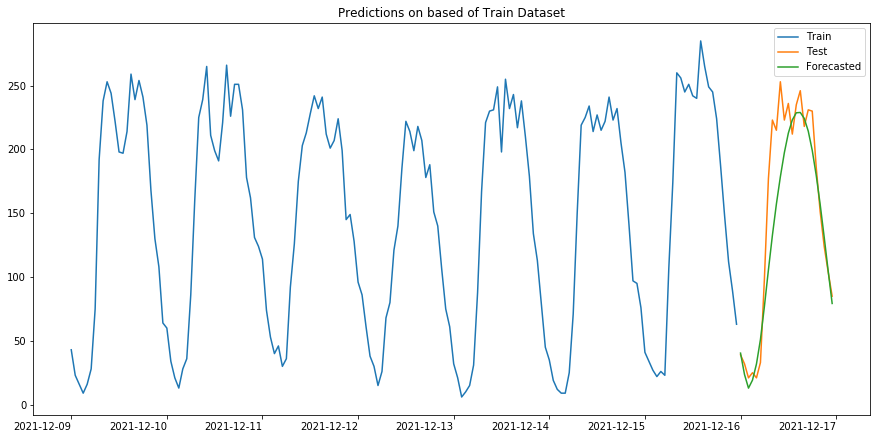

In [423]:
plt.plot(Train["trips"])
plt.plot(Test['trips'])
plt.plot(Test["Predictions"])
plt.title("Predictions on based of Train Dataset")
plt.legend(["Train","Test", "Forecasted"], loc ="upper right")
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(15, 8)
plt.xticks(rotation=0)

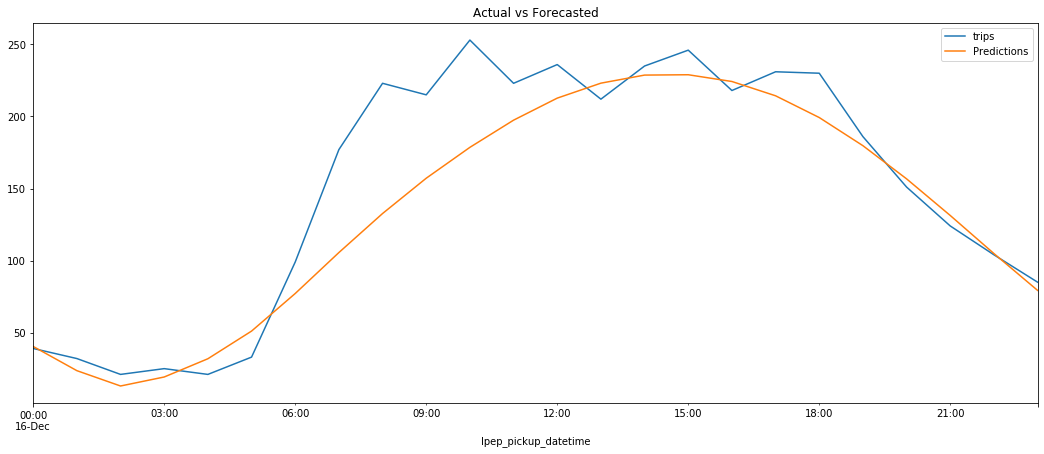

In [424]:
Test.plot(figsize=(18,7),title='Actual vs Forecasted')

In [425]:
mape= np.mean(np.abs((Test['trips'] - Test['Predictions'])/Test['trips']))*100
mape

18.21843548191161